In [ ]:
import pandas as pd
import re
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
train_data = pd.read_csv('./train_new.csv')
train_data.head()

,category,brand,sub_category,product_description,market,review_title,review_text,review_rating
0,Fabric Care,Tide,Laundry,"Tide Pods He Turbo Laundry Detergent Pacs Tub,...",US,The best in a very crowded market,The best general wash detergent. Convenient co...,5.0
1,Fabric Care,Tide,Laundry,"Tide Washing Machine Cleaner, 5 Count",US,First time,This helped to clean our washing machine after...,5.0
2,Home Care,Cascade,Auto Dishwashing,Cascade Platinum ActionPacs Dishwasher Deterge...,US,I've been using another well known brand and d...,I've been using another well known brand and d...,5.0
3,Fabric Care,Tide,Laundry,"Tide Purclean Liquid Laundry Detergent, Honey ...",US,Great laundry detergent,Smell is great and clothes are always clean. G...,5.0
4,Home Care,Mr Clean,Surface Care,"Mr. Clean Magic Eraser Cleaning Pads, 8-Count Box",US,Five Stars,"Good product, works well.",5.0


In [ ]:
train_data = pd.DataFrame(train_data)
train_data.head()

,category,brand,sub_category,product_description,market,review_title,review_text,review_rating
0,Fabric Care,Tide,Laundry,"Tide Pods He Turbo Laundry Detergent Pacs Tub,...",US,The best in a very crowded market,The best general wash detergent. Convenient co...,5.0
1,Fabric Care,Tide,Laundry,"Tide Washing Machine Cleaner, 5 Count",US,First time,This helped to clean our washing machine after...,5.0
2,Home Care,Cascade,Auto Dishwashing,Cascade Platinum ActionPacs Dishwasher Deterge...,US,I've been using another well known brand and d...,I've been using another well known brand and d...,5.0
3,Fabric Care,Tide,Laundry,"Tide Purclean Liquid Laundry Detergent, Honey ...",US,Great laundry detergent,Smell is great and clothes are always clean. G...,5.0
4,Home Care,Mr Clean,Surface Care,"Mr. Clean Magic Eraser Cleaning Pads, 8-Count Box",US,Five Stars,"Good product, works well.",5.0


In [ ]:
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
stop_words = ["product"] + list(stop_words) #the first part adds other words

In [ ]:
# Preprocess function as defined by the user
def preprocess(text):
    text = str(text)   # added this later for this project as there were floats
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = " ".join(text.split())  # Strip whitespace
    text = text.split()
    text = [x for x in text if x not in stop_words]  # Remove stopwords
    text = [x for x in text if x not in ["dr", "doctor"]]  # Remove task-specific stopwords
    text = " ".join(text)
    return text

# Apply the preprocessing to the review text
train_data['text'] = train_data['review_text'].apply(lambda x: preprocess(x))
train_data

,category,brand,sub_category,product_description,market,review_title,review_text,review_rating,text
0,Fabric Care,Tide,Laundry,"Tide Pods He Turbo Laundry Detergent Pacs Tub,...",US,The best in a very crowded market,The best general wash detergent. Convenient co...,5.0,best general wash detergent convenient contain...
1,Fabric Care,Tide,Laundry,"Tide Washing Machine Cleaner, 5 Count",US,First time,This helped to clean our washing machine after...,5.0,helped clean washing machine getting review co...
2,Home Care,Cascade,Auto Dishwashing,Cascade Platinum ActionPacs Dishwasher Deterge...,US,I've been using another well known brand and d...,I've been using another well known brand and d...,5.0,ive using known brand didnt expect difference ...
3,Fabric Care,Tide,Laundry,"Tide Purclean Liquid Laundry Detergent, Honey ...",US,Great laundry detergent,Smell is great and clothes are always clean. G...,5.0,smell great clothes clean great im happy
4,Home Care,Mr Clean,Surface Care,"Mr. Clean Magic Eraser Cleaning Pads, 8-Count Box",US,Five Stars,"Good product, works well.",5.0,good works
...,...,...,...,...,...,...,...,...,...
42196,Home Care,Cascade,Auto Dishwashing,"Cascade ActionPacs Dishwasher Detergent, Origi...",CA,A bit pricey - but I prefer them,I''''m a coupon shopper and I watch prices ver...,5.0,im coupon shopper watch prices closely purchas...
42197,Fabric Care,Downy,Fabric Enhancer,DOWNY 40 L AF,CA,Great product,It has been a while since I used a liquid fabr...,5.0,used liquid fabric softener forgotten great do...
42198,Fabric Care,Gain,Laundry,"Gain Botanicals Plant Based Laundry Detergent,...",CA,Gain mostly unscented - hooray!,I've always found Gain's regular scent a littl...,3.0,ive gains regular scent little overly strong d...
42199,Home Care,Cascade,Auto Dishwashing,"Cascade ActionPacs Dishwasher Detergent, Origi...",CA,Amazing!!,I used to use traditional powder soap in my di...,5.0,used use traditional powder soap dishwasher tr...


In [ ]:
# Function to calculate TF-IDF
def calTFIDF(texts, max_features=None):
    vectorizer = TfidfVectorizer(max_features=max_features, lowercase=True, stop_words=stop_words)
    TFIDF = vectorizer.fit_transform(texts)
    TFIDF = pd.DataFrame(TFIDF.toarray(), columns=vectorizer.get_feature_names_out())
    return TFIDF

In [ ]:
# Calculate the TF-IDF with a maximum of 250 features
TFIDF = calTFIDF(train_data['text'], max_features=25)

In [ ]:
TFIDF

,cascade,clean,clothes,collected,detergent,dishes,dishwasher,fresh,good,great,...,really,review,scent,smell,smells,time,use,used,using,works
0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.482674,0.000000,0.508371,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.500116,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
3,0.000000,0.383292,0.431624,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.713271,...,0.00000,0.000000,0.000000,0.397532,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.658622,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.752474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42196,0.828433,0.000000,0.000000,0.325112,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.319832,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
42197,0.000000,0.000000,0.000000,0.215245,0.0,0.000000,0.000000,0.266633,0.000000,0.380304,...,0.53196,0.211750,0.000000,0.423915,0.0,0.0,0.207013,0.255904,0.000000,0.000000
42198,0.000000,0.195745,0.220427,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.918480,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
42199,0.000000,0.000000,0.000000,0.309633,0.0,0.342095,0.391026,0.000000,0.000000,0.000000,...,0.00000,0.304605,0.000000,0.304904,0.0,0.0,0.297791,0.368122,0.000000,0.000000


In [ ]:
train_data = pd.concat([train_data, TFIDF], axis=1)
train_data.head()

,category,brand,sub_category,product_description,market,review_title,review_text,review_rating,text,cascade,...,really,review,scent,smell,smells,time,use,used,using,works
0,Fabric Care,Tide,Laundry,"Tide Pods He Turbo Laundry Detergent Pacs Tub,...",US,The best in a very crowded market,The best general wash detergent. Convenient co...,5.0,best general wash detergent convenient contain...,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,Fabric Care,Tide,Laundry,"Tide Washing Machine Cleaner, 5 Count",US,First time,This helped to clean our washing machine after...,5.0,helped clean washing machine getting review co...,0.0,...,0.0,0.500116,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,Home Care,Cascade,Auto Dishwashing,Cascade Platinum ActionPacs Dishwasher Deterge...,US,I've been using another well known brand and d...,I've been using another well known brand and d...,5.0,ive using known brand didnt expect difference ...,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000
3,Fabric Care,Tide,Laundry,"Tide Purclean Liquid Laundry Detergent, Honey ...",US,Great laundry detergent,Smell is great and clothes are always clean. G...,5.0,smell great clothes clean great im happy,0.0,...,0.0,0.000000,0.0,0.397532,0.0,0.0,0.0,0.0,0.0,0.000000
4,Home Care,Mr Clean,Surface Care,"Mr. Clean Magic Eraser Cleaning Pads, 8-Count Box",US,Five Stars,"Good product, works well.",5.0,good works,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.752474


In [ ]:
# pip install vaderSentiment
# only needed once

In [ ]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Example function using VADER for sentiment analysis
def get_vader_sentiment(review):
    sentiment = analyzer.polarity_scores(   str(review)   )   # added str because
    return sentiment['compound']  # Compound score represents overall sentiment

# Applying VADER sentiment analysis on the review column
train_data['vader_sentiment'] = train_data['review_text'].apply(get_vader_sentiment)

train_data.head()

,category,brand,sub_category,product_description,market,review_title,review_text,review_rating,text,cascade,...,review,scent,smell,smells,time,use,used,using,works,vader_sentiment
0,Fabric Care,Tide,Laundry,"Tide Pods He Turbo Laundry Detergent Pacs Tub,...",US,The best in a very crowded market,The best general wash detergent. Convenient co...,5.0,best general wash detergent convenient contain...,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.6369
1,Fabric Care,Tide,Laundry,"Tide Washing Machine Cleaner, 5 Count",US,First time,This helped to clean our washing machine after...,5.0,helped clean washing machine getting review co...,0.0,...,0.500116,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.4019
2,Home Care,Cascade,Auto Dishwashing,Cascade Platinum ActionPacs Dishwasher Deterge...,US,I've been using another well known brand and d...,I've been using another well known brand and d...,5.0,ive using known brand didnt expect difference ...,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.5267
3,Fabric Care,Tide,Laundry,"Tide Purclean Liquid Laundry Detergent, Honey ...",US,Great laundry detergent,Smell is great and clothes are always clean. G...,5.0,smell great clothes clean great im happy,0.0,...,0.000000,0.0,0.397532,0.0,0.0,0.0,0.0,0.0,0.000000,0.9594
4,Home Care,Mr Clean,Surface Care,"Mr. Clean Magic Eraser Cleaning Pads, 8-Count Box",US,Five Stars,"Good product, works well.",5.0,good works,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.752474,0.6124


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import sklearn as skl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as sklmetrics

In [ ]:
# Step 1: Split the input variables (X) and outcome variable (Y)

train_dummies_X = train_data.drop(['category', 'brand', 'sub_category', 'product_description', 'market',
                                   'review_title', 'review_text', 'text', 'review_rating'], axis = 1)
train_dummies_Y = train_data['review_rating']

In [ ]:
#train_dummies_X.head()

In [ ]:
# Step 2: Split into training and test data
dum_train_X, dum_test_X, dum_train_Y, dum_test_Y = train_test_split(train_dummies_X, train_dummies_Y,
                                                                                       random_state=37,
                                                                                       train_size = 0.7)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# For decision tree based classification


# The model you want to set the parameters for
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# The parameters to search over for the model
params = {'max_depth':[2,3,4],
          'max_features':['sqrt','log2',None]} #changed auto to sqrt #max_features is max features per depth. None is use all


# Prepare the GridSearch for cross validation
grid_search_dec_tree = GridSearchCV(model, # Note the model is DecisionTreeClassifier as stated above
                                    param_grid=params, # The parameters to search over.
                                   cv=10, # How many hold out sets to use
                                   n_jobs = 1 # Number of parallel processes to run.
                                   )

# Do the cross validation on the training data
grid_search_dec_tree.fit(dum_train_X, dum_train_Y)

# Select the best model

best_dec_tree_cv = grid_search_dec_tree.best_estimator_

# Print the best parameter combination
print(grid_search_dec_tree.best_params_)

{'max_depth': 2, 'max_features': 'log2'}


0.6726166969433695
[[ 488    0    0    0  158]
 [ 213    0    0    0  141]
 [ 326    0    0    0  304]
 [ 401    0    0    0 1115]
 [1487    0    0    0 8028]]


Text(113.9222222222222, 0.5, 'True Value')

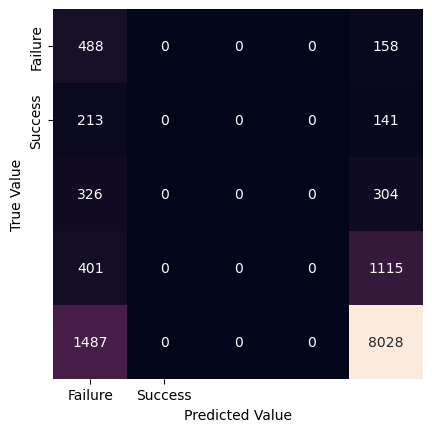

In [ ]:
# Finally test the performance of the best model on the test data

dum_pred_Y = best_dec_tree_cv.predict(dum_test_X)

#Print the accuracy
print(sklmetrics.accuracy_score(dum_test_Y, dum_pred_Y))

conf_mat = sklmetrics.confusion_matrix(dum_test_Y, dum_pred_Y)
print(conf_mat)

# Confusion matrix
sns.heatmap(conf_mat, fmt='d',square=True, annot=True, cbar = False, xticklabels = ['Failure','Success'],
                                                            yticklabels = ['Failure','Success'])
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

In [ ]:
# Defining a function to plot feature importance for trees
# INPUT: Used for Tree based Classifier
#        Feature Names
# OUTPUT: A plot of top most features

def plot_feature_importance(model, Xnames, cls_nm = None):

    # Measuring important features
    imp_features = pd.DataFrame(np.column_stack((Xnames, model.feature_importances_)), columns = ['feature', 'importance'])
    imp_features[['importance']] = imp_features[['importance']].astype(float)
    imp_features[['abs_importance']] = imp_features[['importance']].abs()
    # Sort the features based on absolute value of importance
    imp_features = imp_features.sort_values(by = ['abs_importance'], ascending = [1])

    imp_features = imp_features.iloc[10:]

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,6))
    plt.title(cls_nm + " - Feature Importance")
    plt.barh(range(imp_features.shape[0]), imp_features['importance'],
            color="b", align="center")
    plt.yticks(range(imp_features.shape[0]), imp_features['feature'], )
    plt.ylim([-1, imp_features.shape[0]])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig(cls_nm + "_feature_imp.png", bbox_inches='tight')
    plt.show()

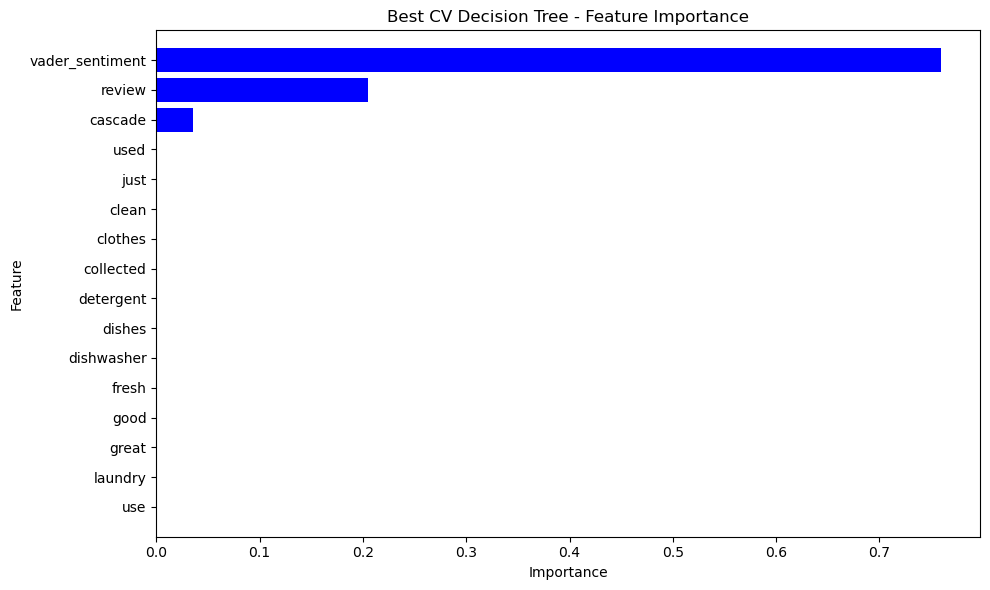

In [ ]:
plot_feature_importance(best_dec_tree_cv, dum_train_X.columns, cls_nm='Best CV Decision Tree')

In [ ]:
# Defining a function to plot coefficients as feature importance
# INPUT: Used for Logistic Regression Classifier
#        Feature Names
# OUTPUT: A plot of top most Coefficients
def plot_feature_importance_coeff(model, Xnames, cls_nm = None):

    imp_features = pd.DataFrame(np.column_stack((Xnames, model.coef_.ravel())), columns = ['feature', 'importance'])
    imp_features[['importance']] = imp_features[['importance']].astype(float)
    imp_features[['abs_importance']] = imp_features[['importance']].abs()
    # Sort the features based on absolute value of importance
    imp_features = imp_features.sort_values(by = ['abs_importance'], ascending = [1])

    # Plot the feature importances of the forest
    plt.figure()
    plt.title(cls_nm + " - Feature Importance")
    plt.barh(range(imp_features.shape[0]), imp_features['importance'],
            color="b", align="center")
    plt.yticks(range(imp_features.shape[0]), imp_features['feature'], )
    plt.ylim([-1, imp_features.shape[0]])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig(cls_nm + "_feature_imp.png", bbox_inches='tight')
    plt.show()

In [ ]:
# Step 0
model = LogisticRegression(class_weight='balanced', solver = 'liblinear', random_state = 42)
    #class_weight is important for impbalanced data (lots more failures here than successes)
        #may lower accuracy but still overall better model
    #random_state is for consistency
    #solver 'liblinear' is faster. default one may not converge

# Step 1: Specify the dictionary of the parameters
params = {'C':[0.01, 0.1, 1, 10, 100],
          'penalty':['l1', 'l2']}
    # Is how much penalty to apply (smaller c, perfer less features. larger c, perfer more features)
    # penalty is type of penalty (the 2 vector norms)

# Step 2: Prepare the GridSearch for cross validation
grid_search_log_reg = GridSearchCV(model,
                                  param_grid=params,
                                  cv = 10,
                                  n_jobs = 2)


# Step 3: Do the cross validation on the training data
grid_search_log_reg.fit(dum_train_X, dum_train_Y)

# Step 4: Select the best model
best_log_reg_cv = grid_search_log_reg.best_estimator_

# Step 4.1: Print the best parameter combination
print(grid_search_log_reg.best_params_)


{'C': 0.01, 'penalty': 'l2'}


0.7355659110654766
[[ 351   27   13    1  254]
 [ 120   18   20    0  196]
 [ 150   24   33    3  420]
 [ 103   31   30    3 1349]
 [ 448   69   88    2 8908]]


Text(113.9222222222222, 0.5, 'True Value')

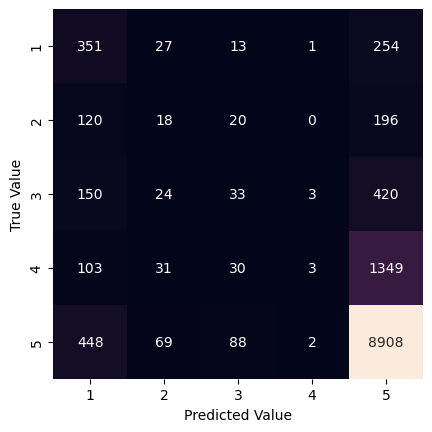

In [ ]:
# Finally test the performance of the best model on the test data

dum_pred_Y = best_log_reg_cv.predict(dum_test_X)

#Print the accuracy
print(sklmetrics.accuracy_score(dum_test_Y, dum_pred_Y))

conf_mat = sklmetrics.confusion_matrix(dum_test_Y, dum_pred_Y)
print(conf_mat)

# Confusion matrix
sns.heatmap(conf_mat, fmt='d',square=True, annot=True, cbar = False, xticklabels = [1, 2, 3, 4, 5],
                                                            yticklabels = [1, 2, 3, 4, 5])
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

In [ ]:
# plot_feature_importance_coeff(best_log_reg_cv, train_dummies_X.columns, cls_nm='Logistic Regression')

In [ ]:
train_data_with_dummies = pd.get_dummies(data = train_data, columns = ['category','brand'])
train_data_with_dummies.head()